# Thermolysin ligands for pharmacophore identification

We explore thrombing ligands that will be used to create ligand-based pharmacophore models

In [10]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,CC(C)C[C@H](C(=O)OC)N(C(=O)C)O,7TLN,INC
1,C[C@@H](C(=O)NCC(=O)Nc1ccc(cc1)[N+](=O)[O-])NC...,5TLN,BAN
2,c1ccc(cc1)C[C@H](CC(=O)O)C(=O)O,1HYT,BZS


In [3]:
def load_mols_from_sdf():
    """ Load ligands from sdf files in this directory.
    """
    mols = []
    legends = []
    for root, dirs, filenames in os.walk("./"):
        for file in filenames:
            if file.endswith(".sdf"):
                supp = Chem.SDMolSupplier(file)
                mol = next(supp)
                mol.RemoveAllConformers()
                mols.append(mol)
                
                legends.append(file.split(".")[0])
    
    return mols, legends

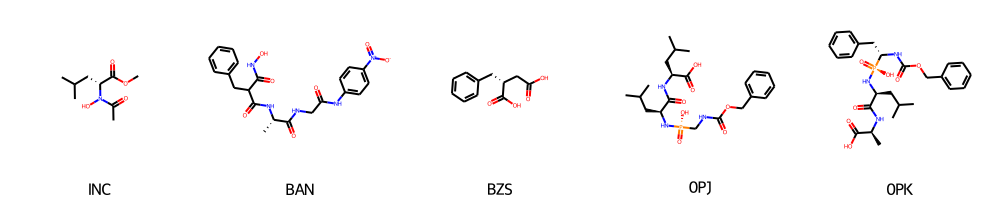

In [4]:
ligs_1 = [
    Chem.MolFromSmiles(smi.encode("unicode_escape")) for smi in lig_df["Smiles"]
]
legends_1 = [l for l in lig_df["LigID"]]

ligs_2, legends_2 = load_mols_from_sdf()

ligands = ligs_1 + ligs_2
legends = legends_1 + legends_2
assert all([l is not None for l in ligands])

Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=5)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [5]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [6]:
pharmacophore.generate_conformers()
print([l.GetNumConformers() for l in pharmacophore.ligands])

[54, 184, 20, 289, 272]


## View 3D structures

In [7]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

In [8]:
pharmacophore.find_chem_feats()
pprint(pharmacophore.feats)

[{'A': [(6,), (11,), (13,)],
  'D': [(13,)],
  'H': [(1, 0, 2), (8,), (12,)],
  'N': [],
  'P': [],
  'R': []},
 {'A': [(3,), (7,), (16,), (17,), (20,), (30,), (32,)],
  'D': [(4,), (8,), (18,), (31,), (32,)],
  'H': [(0,)],
  'N': [],
  'P': [],
  'R': [(9, 10, 11, 12, 13, 14), (23, 24, 25, 26, 27, 28)]},
 {'A': [(10,), (11,), (13,), (14,)],
  'D': [],
  'H': [],
  'N': [(9, 10, 11), (12, 13, 14)],
  'P': [],
  'R': [(0, 1, 2, 3, 4, 5)]},
 {'A': [(1,), (13,), (14,), (18,), (26,), (31,)],
  'D': [(10,), (15,), (23,)],
  'H': [(20, 21, 22), (28, 29, 30)],
  'N': [(25, 26, 31)],
  'P': [],
  'R': [(4, 5, 6, 7, 8, 9)]},
 {'A': [(1,), (13,), (14,), (25,), (33,), (35,)],
  'D': [(10,), (22,), (30,)],
  'H': [(27, 28, 29), (34,)],
  'N': [(32, 33, 35)],
  'P': [],
  'R': [(4, 5, 6, 7, 8, 9), (16, 17, 19, 21, 20, 18)]}]


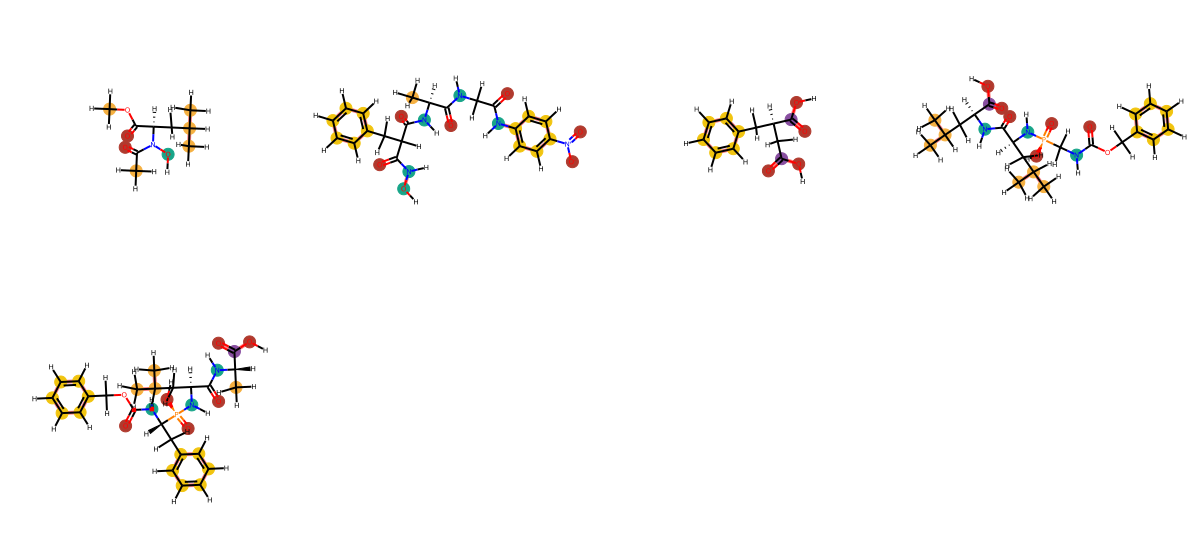

In [11]:
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())